# How To Read and Plot a Data File

In this example we will see how to open a text file containing some data we want to plot

In [1]:
import numpy as np

We fake some data by using a random number generator

In [2]:
x = np.random.uniform(0.0,3.0,100)
y = np.random.uniform(10.0,100.0,100)

We now add a column with sequential number to fake the day the data was taken for example

In [3]:
xx=np.c_[np.linspace(1,100,100), x, y]

In [4]:
#print the first 10 rows
print(xx[:10,:])
print('\n')
# and the last 10 rows
print(xx[-10:,:])

[[ 1.          1.90591851 30.77037519]
 [ 2.          0.51708172 32.77087945]
 [ 3.          0.23523342 95.98522338]
 [ 4.          0.21198808 33.16296232]
 [ 5.          0.79349108 35.17069215]
 [ 6.          1.54370726 93.73592764]
 [ 7.          1.59717188 67.14994953]
 [ 8.          1.17538383 69.27876954]
 [ 9.          0.59102727 15.30387203]
 [10.          2.30165991 51.28072151]]


[[ 91.           0.59602536  48.28746597]
 [ 92.           1.49808929  56.23929227]
 [ 93.           0.66399667  16.55426131]
 [ 94.           2.29476938  96.96114433]
 [ 95.           1.56345792  55.19399315]
 [ 96.           0.5838818   93.01634866]
 [ 97.           2.26541644  36.46825209]
 [ 98.           1.45057737  97.5033105 ]
 [ 99.           0.44316349  22.35637595]
 [100.           2.51190111  25.45490424]]


In [5]:
# We save the table in a human-readable format
np.savetxt('./fake_data.txt',xx,
           header='giorno \t | temp \t | press',
           comments='# fake data\n# generated by me\n',
           delimiter='\t|',
           fmt='%1.3f')

In [6]:
#we can check the content of the file
#!head ./fake_data.txt

## Read the Data File

In [7]:
# load the data table
data = np.genfromtxt('./fake_data.txt',
                     delimiter="|",
                     skip_header=2,
                     names=True)

print('Column names and dtypes: ', data.dtype)
print('Data array shape: ',data.shape)

Column names and dtypes:  [('giorno', '<f8'), ('temp', '<f8'), ('press', '<f8')]
Data array shape:  (100,)


In [8]:
print(data['press'])

[30.77  32.771 95.985 33.163 35.171 93.736 67.15  69.279 15.304 51.281
 93.97  52.055 96.408 31.38  58.393 93.274 66.791 37.227 57.133 29.374
 84.248 54.818 23.367 39.046 87.266 37.912 22.688 12.696 84.978 83.756
 84.411 43.565 39.217 64.14  87.646 69.539 37.752 44.064 34.051 11.39
 71.648 81.654 98.224 31.888 27.723 94.121 44.18  50.443 98.612 52.421
 33.091 53.979 41.223 40.975 95.134 34.307 82.2   27.866 85.322 87.101
 49.084 39.437 68.125 88.694 29.259 78.586 92.041 72.254 81.731 76.252
 10.278 53.491 97.251 52.382 47.181 74.571 49.638 70.909 80.735 68.479
 29.83  95.034 45.605 91.921 81.546 72.689 96.567 73.524 58.007 16.366
 48.287 56.239 16.554 96.961 55.194 93.016 36.468 97.503 22.356 25.455]


## Produce Some Plots

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

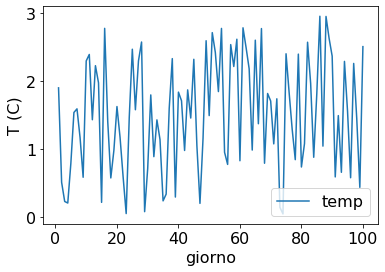

In [10]:
plt.plot(data['giorno'], data['temp'], label='temp')
plt.legend(loc='lower right')
plt.xlabel('giorno')
plt.ylabel('T (C)')
plt.show() #this is actually only needed outside a jupyter notebook

## Another Way to Read a Table

We will use the [pandas library](pandas.pydata.org): "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool". This method is useful expecially for very large tables and to better control formatting.

In [11]:
import pandas

data2 = pandas.read_csv('./fake_data.txt',
                        sep='|',
                        comment='#',
                        header=0,
                        engine='python')

In [12]:
data2 #show the table

,giorno \t,temp \t,press
0,1.0,1.906,30.770
1,2.0,0.517,32.771
2,3.0,0.235,95.985
3,4.0,0.212,33.163
4,5.0,0.793,35.171
...,...,...,...
95,96.0,0.584,93.016
96,97.0,2.265,36.468
97,98.0,1.451,97.503
98,99.0,0.443,22.356


In [13]:
print(data2.columns)

Index(['giorno \t ', ' temp \t ', ' press'], dtype='object')


Let's clean the header by removing the tab in the name of the columns since we don't like it.

In [14]:
data2.columns = data2.columns.str.strip()
print(data2.columns)

Index(['giorno', 'temp', 'press'], dtype='object')


In [15]:
data2

,giorno,temp,press
0,1.0,1.906,30.770
1,2.0,0.517,32.771
2,3.0,0.235,95.985
3,4.0,0.212,33.163
4,5.0,0.793,35.171
...,...,...,...
95,96.0,0.584,93.016
96,97.0,2.265,36.468
97,98.0,1.451,97.503
98,99.0,0.443,22.356


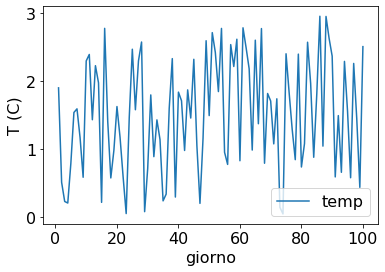

In [16]:
plt.plot(data2['giorno'], data2['temp'], label='temp')
plt.legend(loc='lower right')
plt.xlabel('giorno')
plt.ylabel('T (C)')
plt.show() #this is actually only needed outside a jupyter notebook

## Exercise
Try to read one of the city of Milan data file and make some plots. The data can be found [here](https://dati.comune.milano.it/dataset?groups=envi).

An example, could be the database ["Meteo: temperatura per mese"](https://dati.comune.milano.it/dataset/ds305-ambientemeteo-temperature-mese-2008-2014). The link to the cvs file is [this one](https://dati.comune.milano.it/datastore/dump/b9b08f03-058f-4f91-af5c-1b987a2891ce?bom=True).

Pay attention that in Italy a comma is used to separate decimals. Pandas allows to read those data by specifying `decimal=','` in the options of `pandas.read_csv`.

You can of course read also any other data file you already have.